<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-9a6ea569cd30>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### Task 2: Generate Descriptive Statistics and Visualizations

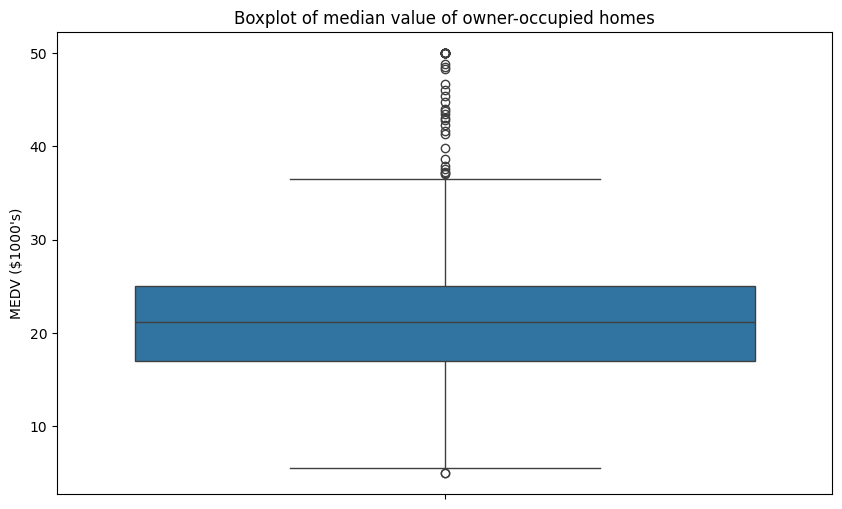

In [6]:
# Boxplot for the 'Median value of owner-occupied homes' (MEDV)
plt.figure(figsize=(10,6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of median value of owner-occupied homes')
plt.ylabel('MEDV ($1000\'s)')
plt.show()

##### Explanation: The median value is around 21,000 USD with some outliers above 37,000 USD. 

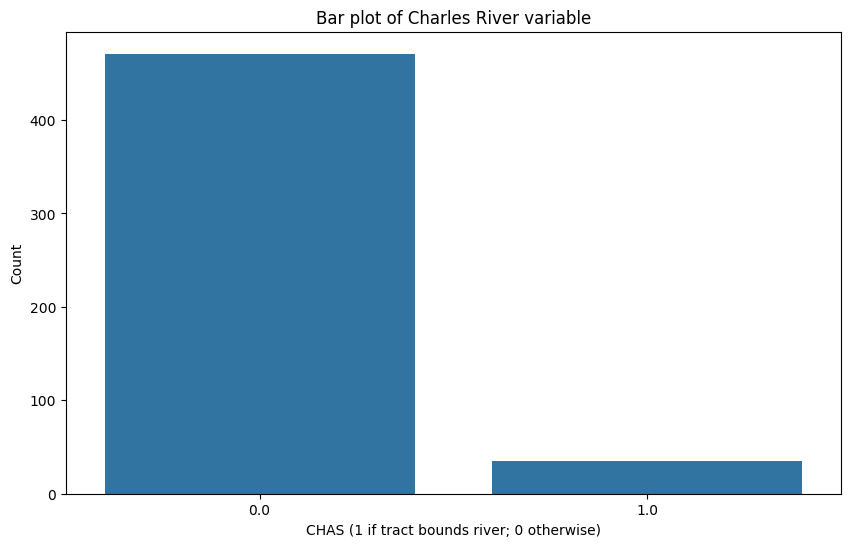

In [7]:
# Bar plot for the Charles river variable (CHAS)
plt.figure(figsize=(10,6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar plot of Charles River variable')
plt.xlabel('CHAS (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Count')
plt.show()

##### Explanation: The bar plot shows the count of houses bounded by the Charles river (CHAS = 1) and those that are not (CHAS = 0). There are significantly more houses not bounded by the river.

In [8]:
# Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

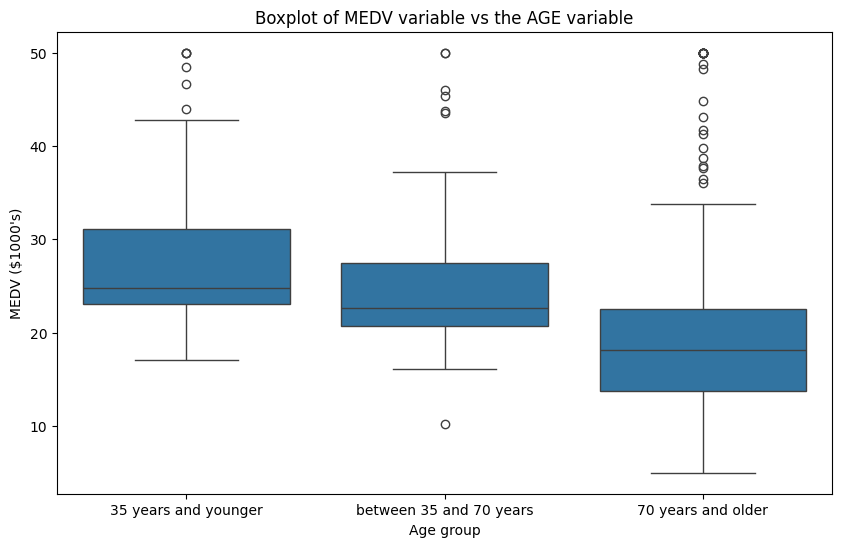

In [9]:
# Boxplot for the MEDV variable vs the AGE variable
plt.figure(figsize=(10,6))
sns.boxplot(x=boston_df['AGE_GROUP'], y=boston_df['MEDV'])
plt.title('Boxplot of MEDV variable vs the AGE variable')
plt.xlabel('Age group')
plt.ylabel('MEDV ($1000\'s)')
plt.show()

##### Explanation: Houses in the "35 years and younger" group tend to have higher median values compared to older houses.

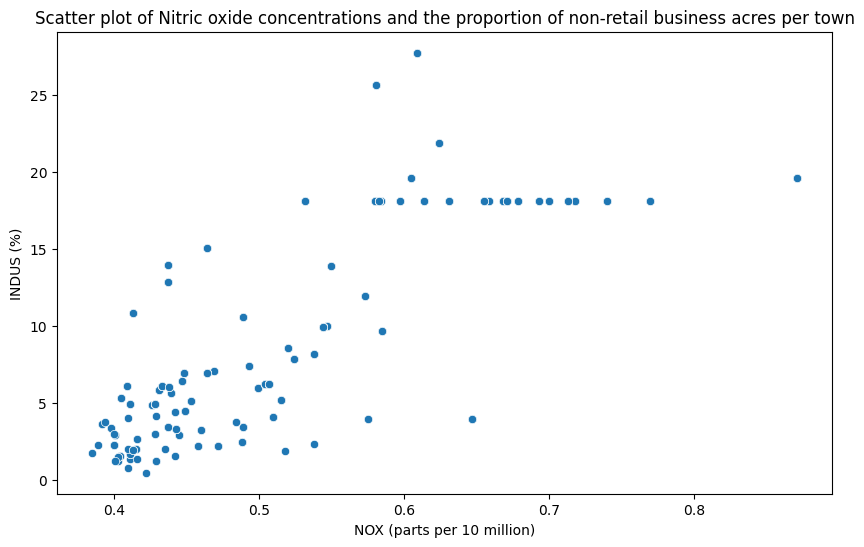

In [10]:
# Scatter plot to show the relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS). 
plt.figure(figsize=(10,6))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title('Scatter plot of Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.xlabel('NOX (parts per 10 million)')
plt.ylabel('INDUS (%)')
plt.show()

##### Explanation: The scatter plot indicates that there is a positive correlation between NOX and INDUS. This means that as the concentration of Nitric oxide increases, the proportion of non-retail business acres per town also increases.

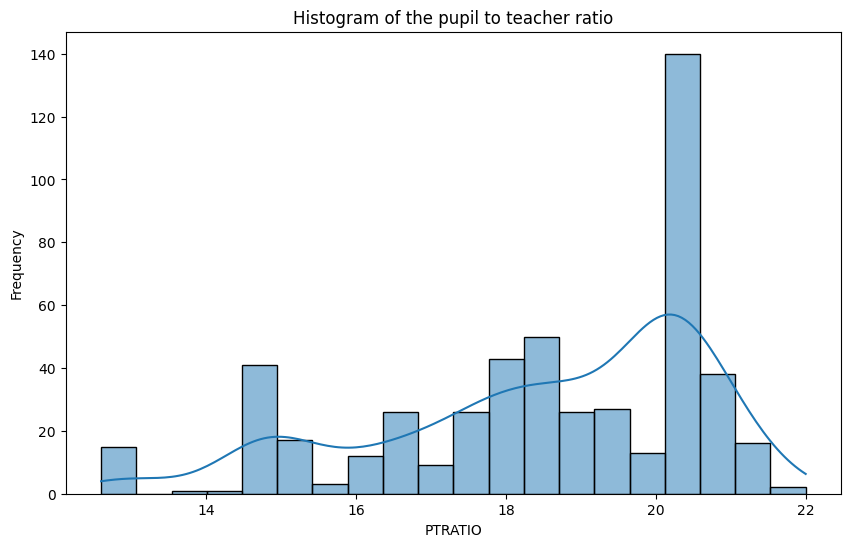

In [11]:
# Histogram for the pupil to teacher ratio variable (PTRATIO)
plt.figure(figsize=(10,6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title('Histogram of the pupil to teacher ratio')
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.show()

##### Explanation: Most towns have a pupil-to-teacher ratio between 15 and 21.

### Task 3: Use the appropriate tests to answer the questions provided.

### T-test

##### Null Hypothesis: There is no significant difference in median value of houses bounded by the Charles river and those not bounded by the Charles river.
##### Alternative Hypothesis: There is a significant difference in median value of houses bounded by the Charles river and those not bounded by the Charles river.

In [12]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
t_stat, p_value = stats.ttest_ind(chas_0, chas_1)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -3.996437466090509, P-value: 7.390623170519905e-05


##### There is a significant difference in median value of houses bounded by the Charles river and those not bounded by the Charles river (p_value < 0.05)

### ANOVA

##### Null Hypothesis: There is no significant difference in median value of houses for different age groups of owner-occupied units built prior to 1940.
##### Alternative Hypothesis: There is a significant difference in median value of houses for different age groups of owner-occupied units built prior to 1940.

In [13]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
anova_model = ols('MEDV ~ AGE_GROUP', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_model)
print(anova_table)

              df        sum_sq      mean_sq         F        PR(>F)
AGE_GROUP    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


##### There is a significant difference in Median values of houses for each proportion of owner occupied units built prior to 1940 (PR(>F) < 0.05)

### Pearson Correlation

##### Null Hypothesis: There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
##### Alternative Hypothesis: There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [14]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
correlation_coef, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Correlation coeficient: {correlation_coef}, P-value: {p_value}") 

Correlation coeficient: 0.7636514469209192, P-value: 7.913361061210442e-98


##### There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town (p_value < 0.05)

### Regression analysis

##### Null Hypothesis: The weighted distance to the five Boston employment centres has no significant impact on the median value of owner-occupied homes.
##### Alternative Hypothesis: The weighted distance to the five Boston employment centres has a significant impact on the median value of owner-occupied homes.

In [15]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
regression_model = ols('MEDV ~ DIS', data=boston_df).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 09 May 2025   Prob (F-statistic):           1.21e-08
Time:                        16:49:44   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

##### An additional weighted distance to the five Boston employment centres has a positive and statistically significant impact on the median value of owner occupied homes.
##### For each additiona unit increase in the weighted distance, the median value of homes increases by $1091.60.